<a href="https://colab.research.google.com/github/RedaRafi/Breast-Cancer-Detection-/blob/main/Breast_Cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Breast Cancer detection Using TensorFlow 




We are going to use tensorflow 2.3 to build the model. 

In [1]:
 !pip install tensorflow-gpu==2.3.0-rc0

     |████████████████████████████████| 320.3MB 51kB/s 
     |████████████████████████████████| 3.0MB 43.5MB/s 
     |████████████████████████████████| 460kB 35.6MB/s 
ERROR: tensorflow 2.3.0 has requirement tensorboard<3,>=2.3.0, but you'll have tensorboard 2.2.2 which is incompatible.
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0



#Importing necessary library that will use in model building.


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D

from tensorflow.keras.optimizers import Adam




In [3]:
import pandas as pd
import numpy as np
import  seaborn as sns
import matplotlib.pyplot as plt
import pandas.util.testing as tm

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  """


In [5]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# *Loading the breast cancer classification dataset.*

In [6]:
cancer = datasets.load_breast_cancer()


*   Pandas DataFrame to present all My data. 
*   Create a dataframe with our cancer data and target data.





In [7]:
X = pd.DataFrame(data = cancer.data, columns=cancer.feature_names)
X.head() 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
y = cancer.target
cancer.target_names
X.shape

(569, 30)

# split the dataset in a random manner.
*using SciKit library*

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)
X_train.shape


(455, 30)

In [10]:
X_test.shape

(114, 30)

*removes the mean and scales the data to unit variance.*

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [12]:
X_train = X_train.reshape(455,30,1)
X_test = X_test.reshape(114, 30, 1)

# Building Model 


In [13]:
epochs = 50
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape = (30,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 29, 32)            96        
_________________________________________________________________
batch_normalization (BatchNo (None, 29, 32)            128       
_________________________________________________________________
dropout (Dropout)            (None, 29, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1792)              0

In [14]:
model.compile(optimizer=Adam(lr=0.00005), loss = 'binary_crossentropy', metrics=['accuracy'])

*Trains the model for a fixed number of epochs (iterations on a dataset).*

In [15]:
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
15/15 [==============================] - 0s 21ms/step - loss: 1.0208 - accuracy: 0.5868 - val_loss: 0.6352 - val_accuracy: 0.8772
Epoch 2/50
15/15 [==============================] - 0s 9ms/step - loss: 0.5860 - accuracy: 0.7077 - val_loss: 0.5887 - val_accuracy: 0.9123
Epoch 3/50
15/15 [==============================] - 0s 9ms/step - loss: 0.5750 - accuracy: 0.7495 - val_loss: 0.5469 - val_accuracy: 0.9035
Epoch 4/50
15/15 [==============================] - 0s 9ms/step - loss: 0.4678 - accuracy: 0.7912 - val_loss: 0.5058 - val_accuracy: 0.8772
Epoch 5/50
15/15 [==============================] - 0s 8ms/step - loss: 0.3927 - accuracy: 0.8330 - val_loss: 0.4705 - val_accuracy: 0.8772
Epoch 6/50
15/15 [==============================] - 0s 10ms/step - loss: 0.3173 - accuracy: 0.8813 - val_loss: 0.4395 - val_accuracy: 0.8772
Epoch 7/50
15/15 [==============================] - 0s 9ms/step - loss: 0.2934 - accuracy: 0.8681 - val_loss: 0.4102 - val_accuracy: 0.8772
Epoch 8/50
15/15 [

In [16]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

In [17]:
history.history

{'accuracy': [0.58681321144104,
  0.7076923251152039,
  0.7494505643844604,
  0.791208803653717,
  0.8329670429229736,
  0.8813186883926392,
  0.8681318759918213,
  0.8813186883926392,
  0.8813186883926392,
  0.9076923131942749,
  0.9142857193946838,
  0.89670330286026,
  0.9076923131942749,
  0.898901104927063,
  0.9406593441963196,
  0.9142857193946838,
  0.9164835214614868,
  0.9252747297286987,
  0.9406593441963196,
  0.9274725317955017,
  0.9274725317955017,
  0.9252747297286987,
  0.9252747297286987,
  0.9428571462631226,
  0.9054945111274719,
  0.9560439586639404,
  0.9538461565971375,
  0.9538461565971375,
  0.9428571462631226,
  0.9626373648643494,
  0.9362637400627136,
  0.9384615421295166,
  0.9582417607307434,
  0.9274725317955017,
  0.9428571462631226,
  0.9472527503967285,
  0.9428571462631226,
  0.9560439586639404,
  0.9384615421295166,
  0.9692307710647583,
  0.9516483545303345,
  0.9670329689979553,
  0.9538461565971375,
  0.9692307710647583,
  0.9714285731315613,
  0.

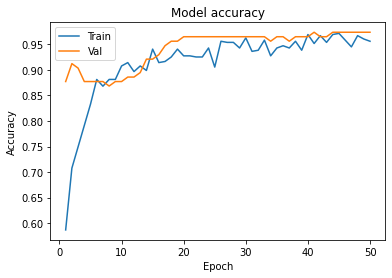

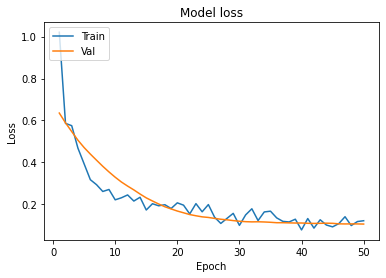

In [18]:
plot_learningCurve(history, epochs)